# This code starts off with defining helper functions and graphical functions to display. My own code for Simulated Annealing and Genetic Algorithms comes later in this notebook.

In [1]:
import numpy as np
import numpy.random as npr
import itertools

_norm = lambda x: np.linalg.norm(x, 1)**2
_inf_norm = lambda x: np.max(x**2)

In [2]:
# Langermann Parameters
def rand_a(num_points=30, num_dims=10):
    return npr.rand(num_points, num_dims) * 10

def rand_c(num_points=10):
    return npr.rand(num_points)

sample_a = np.array([
    [9.681, 0.667, 4.783, 9.095, 3.517, 9.325, 6.544, 0.211, 5.122, 2.020],
    [9.400, 2.041, 3.788, 7.931, 2.882, 2.672, 3.568, 1.284, 7.033, 7.374],
    [8.025, 9.152, 5.114, 7.621, 4.564, 4.711, 2.996, 6.126, 0.734, 4.982],
    [2.196, 0.415, 5.649, 6.979, 9.510, 9.166, 6.304, 6.054, 9.377, 1.426],
    [8.074, 8.777, 3.467, 1.863, 6.708, 6.349, 4.534, 0.276, 7.633, 1.567],
    [7.650, 5.658, 0.720, 2.764, 3.278, 5.283, 7.474, 6.274, 1.409, 8.208],
    [1.256, 3.605, 8.623, 6.905, 0.584, 8.133, 6.071, 6.888, 4.187, 5.448],
    [8.314, 2.261, 4.224, 1.781, 4.124, 0.932, 8.129, 8.658, 1.208, 5.762],
    [0.226, 8.858, 1.420, 0.945, 1.622, 4.698, 6.228, 9.096, 0.972, 7.637],
    [7.305, 2.228, 1.242, 5.928, 9.133, 1.826, 4.060, 5.204, 8.713, 8.247],
    [0.652, 7.027, 0.508, 4.876, 8.807, 4.632, 5.808, 6.937, 3.291, 7.016],
    [2.699, 3.516, 5.874, 4.119, 4.461, 7.496, 8.817, 0.690, 6.593, 9.789],
    [8.327, 3.897, 2.017, 9.570, 9.825, 1.150, 1.395, 3.885, 6.354, 0.109],
    [2.132, 7.006, 7.136, 2.641, 1.882, 5.943, 7.273, 7.691, 2.880, 0.564],
    [4.707, 5.579, 4.080, 0.581, 9.698, 8.542, 8.077, 8.515, 9.231, 4.670],
    [8.304, 7.559, 8.567, 0.322, 7.128, 8.392, 1.472, 8.524, 2.277, 7.826],
    [8.632, 4.409, 4.832, 5.768, 7.050, 6.715, 1.711, 4.323, 4.405, 4.591],
    [4.887, 9.112, 0.170, 8.967, 9.693, 9.867, 7.508, 7.770, 8.382, 6.740],
    [2.440, 6.686, 4.299, 1.007, 7.008, 1.427, 9.398, 8.480, 9.950, 1.675],
    [6.306, 8.583, 6.084, 1.138, 4.350, 3.134, 7.853, 6.061, 7.457, 2.258],
    [0.652, 2.343, 1.370, 0.821, 1.310, 1.063, 0.689, 8.819, 8.833, 9.070],
    [5.558, 1.272, 5.756, 9.857, 2.279, 2.764, 1.284, 1.677, 1.244, 1.234],
    [3.352, 7.549, 9.817, 9.437, 8.687, 4.167, 2.570, 6.540, 0.228, 0.027],
    [8.798, 0.880, 2.370, 0.168, 1.701, 3.680, 1.231, 2.390, 2.499, 0.064],
    [1.460, 8.057, 1.336, 7.217, 7.914, 3.615, 9.981, 9.198, 5.292, 1.224],
    [0.432, 8.645, 8.774, 0.249, 8.081, 7.461, 4.416, 0.652, 4.002, 4.644],
    [0.679, 2.800, 5.523, 3.049, 2.968, 7.225, 6.730, 4.199, 9.614, 9.229],
    [4.263, 1.074, 7.286, 5.599, 8.291, 5.200, 9.214, 8.272, 4.398, 4.506],
    [9.496, 4.830, 3.150, 8.270, 5.079, 1.231, 5.731, 9.494, 1.883, 9.732],
    [4.138, 2.562, 2.532, 9.661, 5.611, 5.500, 6.886, 2.341, 9.699, 6.500]
])


sample_c = np.array([
    0.806,
    0.517,
    0.1,
    0.908,
    0.965,
    0.669,
    0.524,
    0.902,
    0.531,
    0.876,
    0.462,
    0.491,
    0.463,
    0.714,
    0.352,
    0.869,
    0.813,
    0.811,
    0.828,
    0.964,
    0.789,
    0.360,
    0.369,
    0.992,
    0.332,
    0.817,
    0.632,
    0.883,
    0.608,
    0.326
])


In [3]:
# Shekel Parameters
def rand_holes(num_holes=30, num_dims=10):
    return npr.rand(num_holes, num_dims) * 10

def rand_weights(num_holes=10):
    return npr.rand(num_holes)

sample_holes = np.array([
    [9.681, 0.667, 4.783, 9.095, 3.517, 9.325, 6.544, 0.211, 5.122, 2.020],
    [9.400, 2.041, 3.788, 7.931, 2.882, 2.672, 3.568, 1.284, 7.033, 7.374],
    [8.025, 9.152, 5.114, 7.621, 4.564, 4.711, 2.996, 6.126, 0.734, 4.982],
    [2.196, 0.415, 5.649, 6.979, 9.510, 9.166, 6.304, 6.054, 9.377, 1.426],
    [8.074, 8.777, 3.467, 1.863, 6.708, 6.349, 4.534, 0.276, 7.633, 1.567],
    [7.650, 5.658, 0.720, 2.764, 3.278, 5.283, 7.474, 6.274, 1.409, 8.208],
    [1.256, 3.605, 8.623, 6.905, 0.584, 8.133, 6.071, 6.888, 4.187, 5.448],
    [8.314, 2.261, 4.224, 1.781, 4.124, 0.932, 8.129, 8.658, 1.208, 5.762],
    [0.226, 8.858, 1.420, 0.945, 1.622, 4.698, 6.228, 9.096, 0.972, 7.637],
    [7.305, 2.228, 1.242, 5.928, 9.133, 1.826, 4.060, 5.204, 8.713, 8.247],
    [0.652, 7.027, 0.508, 4.876, 8.807, 4.632, 5.808, 6.937, 3.291, 7.016],
    [2.699, 3.516, 5.874, 4.119, 4.461, 7.496, 8.817, 0.690, 6.593, 9.789],
    [8.327, 3.897, 2.017, 9.570, 9.825, 1.150, 1.395, 3.885, 6.354, 0.109],
    [2.132, 7.006, 7.136, 2.641, 1.882, 5.943, 7.273, 7.691, 2.880, 0.564],
    [4.707, 5.579, 4.080, 0.581, 9.698, 8.542, 8.077, 8.515, 9.231, 4.670],
    [8.304, 7.559, 8.567, 0.322, 7.128, 8.392, 1.472, 8.524, 2.277, 7.826],
    [8.632, 4.409, 4.832, 5.768, 7.050, 6.715, 1.711, 4.323, 4.405, 4.591],
    [4.887, 9.112, 0.170, 8.967, 9.693, 9.867, 7.508, 7.770, 8.382, 6.740],
    [2.440, 6.686, 4.299, 1.007, 7.008, 1.427, 9.398, 8.480, 9.950, 1.675],
    [6.306, 8.583, 6.084, 1.138, 4.350, 3.134, 7.853, 6.061, 7.457, 2.258],
    [0.652, 2.343, 1.370, 0.821, 1.310, 1.063, 0.689, 8.819, 8.833, 9.070],
    [5.558, 1.272, 5.756, 9.857, 2.279, 2.764, 1.284, 1.677, 1.244, 1.234],
    [3.352, 7.549, 9.817, 9.437, 8.687, 4.167, 2.570, 6.540, 0.228, 0.027],
    [8.798, 0.880, 2.370, 0.168, 1.701, 3.680, 1.231, 2.390, 2.499, 0.064],
    [1.460, 8.057, 1.336, 7.217, 7.914, 3.615, 9.981, 9.198, 5.292, 1.224],
    [0.432, 8.645, 8.774, 0.249, 8.081, 7.461, 4.416, 0.652, 4.002, 4.644],
    [0.679, 2.800, 5.523, 3.049, 2.968, 7.225, 6.730, 4.199, 9.614, 9.229],
    [4.263, 1.074, 7.286, 5.599, 8.291, 5.200, 9.214, 8.272, 4.398, 4.506],
    [9.496, 4.830, 3.150, 8.270, 5.079, 1.231, 5.731, 9.494, 1.883, 9.732],
    [4.138, 2.562, 2.532, 9.661, 5.611, 5.500, 6.886, 2.341, 9.699, 6.500]
])

sample_weights = np.array([
    0.806,
    0.517,
    0.1,
    0.908,
    0.965,
    0.669,
    0.524,
    0.902,
    0.531,
    0.876,
    0.462,
    0.491,
    0.463,
    0.714,
    0.352,
    0.869,
    0.813,
    0.811,
    0.828,
    0.964,
    0.789,
    0.360,
    0.369,
    0.992,
    0.332,
    0.817,
    0.632,
    0.883,
    0.608,
    0.326
])

In [4]:
# Helpful function
import struct


def bitstr2float(s):
    """Transforms a bit representation of a number between 0 and 1 to a
    floating point number. This is less error-prone (I believe) than
    something like float division.

    Additionally, if len(s) < 52, this method will choose the midpoint
    between two decimal values to guaratee that each value is equally
    displaced.

    :param str s: A string formatted as a bitstring
    """
    if len(s) < 52:
        s = s + ("1" + "0" * (51 - len(s)))
    elif len(s) > 52:
        raise ValueError("Bitstring cannot be longer than 52 bits (floating point number limit).")
    # https://stackoverflow.com/a/8751666
    b = '0b001111111111{}'.format(s)
    return struct.unpack('d', struct.pack('Q', int(b, 0)))[0] - 1


In [5]:
def sphere(x):
    """
    The sphere model. A basic function, where the minimum is at (1,1).

    Range: x_i in [-5, 5]

    :param numpy.ndarray x: The input vector
    """
    return _norm(x - 1.0)

def sphere_c(x):
    return np.all(np.logical_and(
        x >= -5,
        x <= 5
    ))

In [6]:
def griew(x, D=4000.0):
    """
    Griewank's function. Similar to the sphere function, but much
    noisier around each point. The obvious minimum is at (100,100).

    Range: x_i in [0, 200]

    :param numpy.ndarray x: The input vector
    """
    n = len(x)
    term1 = _norm(x - 100) / D
    term2 = np.prod(np.cos((x-100) / np.sqrt(np.arange(n)+1)))
    return term1 - term2 + 1.0

def griew_c(x):
    return True

In [7]:
def shekel(x, holes=sample_holes, weights=sample_weights):
    """
    Modified Shekel's Foxholes. The function is mostly uniform, except
    for points very close to each "foxhole," in which the function
    dramatically decreases.

    Range: x_i in [0, 10]

    :param numpy.ndarray x: The (n x 1) input vector
    :param numpy.ndarray holes: An (n x m) matrix, consisting of m (n x 1) holes
    :param numpy.ndarray weights: A (m x 1) vector specifying the depth of each hole
    """
    n = len(x)
    m = holes.shape[0]
    if n > holes.shape[1]:
        raise ValueError(
            "Dimension of x is greater than dimension of holes. ({} > {})"
            .format(n, holes.shape[1])
        )
    return sum([-1.0 / (_norm(x - holes[j,:n] + weights[j])) for j in range(m)])

def shekel_c(x):
    return np.all(np.logical_and(
        x >= 0,
        x <= 10
    ))

In [8]:
def micha(x, m=10):
    """
    Michalewitz's function. A noisy function with many local minima.

    Range: x_i in [-100, 100]

    :param numpy.ndarray x: The (n x 1) input vector
    :param float m: Parameter that affects the level of variation in the curves
    """
    n = len(x)
    cos_pi_6 = np.cos(np.pi / 6)
    sin_pi_6 = np.sin(np.pi / 6)
    y = np.zeros(n)
    y[::2] = [x1 * cos_pi_6 - x2 * sin_pi_6 for (x1, x2) in zip(x[:-1], x[1:])]
    y[1::2] = [x1 * sin_pi_6 + x2 * cos_pi_6 for (x2, x1) in zip(x[1:], x[:-1])]
    y[n-1] = x[n-1]
    return sum(np.sin(y) * np.sin((np.arange(n) + 1) * y**2 / np.pi)**(2*m))

def micha_c(x):
    ## This works anywhere and couldn't find any constraint
    ## specification. A good choice of range might be (-100, 100) for
    ## any dimension.
    return True

In [9]:
def langermann(x, a=sample_a, c=sample_c):
    """Langermann's function. Another noisy function, although local maxima/minima are located near points given in the a matrix.

    Range: x_i in [0, 10]

    :param numpy.ndarray x: The (n x 1) input vector
    :param numpy.ndarray a: An (n x m) matrix of m (n x 1) vectors; each specifying a "region of more instability"
    :param numpy.ndarray c: An (m x 1) vector of weights associated with each vector in a.
    """
    n = len(x)
    m = a.shape[0]
    if n > a.shape[1]:
        raise ValueError(
            "Dimension of x is greater than dimension of a. ({} > {})"
            .format(n, a.shape[1])
        )
    term1 = [np.exp(-_norm(x - a[i,:n]) / np.pi) for i in range(m)]
    term2 = [np.cos(np.pi * _norm(x - a[i,:n])) for i in range(m)]
    return sum([c_i * term1_i * term2_i for (c_i, term1_i, term2_i) in zip(c, term1, term2)])

def langermann_c(x):
    return np.all(np.logical_and(
        x >= 0,
        x <= 10
    ))

In [10]:
default_center_point = np.array([1., 1.3, .8, -.4, -1.3, 1.6, -.2, -.6, .5, 1.4,
                                 1., 1.3, .8, -.4, -1.3, 1.6, -.2, -.6, .5, 1.4])

def odd_square(x, center_point=default_center_point, c=0.2):
    """The Odd Square function. As the function approaches the center
point, it begins to oscillate more and more.

    Range: x_i is in (-5 pi, 5 pi)

    :param numpy.ndarray x: The (n x 1) input vector
    """
    n = len(x)
    dist = _inf_norm(x - center_point[:n])
    term1 = np.exp(-dist / (2 * np.pi))
    term2 = np.cos(np.pi * dist)
    term3 = 1 + c * dist / (dist + 0.01)
    return term1 * term2 * term3

def odd_square_c(x):
    return np.all(np.logical_and(
        x >= -5 * np.pi,
        x <= 5 * np.pi
    ))

In [11]:
def bump(x):
    """The Bump function. Very smooth, but note that the constraints on
    this function cannot be easily encoded into the chromosonal design
    of the GA.

    Range: x_i is in (0,100)

    :param numpy.ndarray x: The (n x 1) input vector
    """
    n = len(x)
    cos_x = np.cos(x)
    term1 = np.sum(cos_x**4) - 2 * np.prod(cos_x**2)
    term2 = np.sqrt(np.sum(np.multiply(1.0 + np.arange(n), x**2)))
    return abs(term1 / term2)

def bump_c(x):
    ## \prod_{i=1}^n x_i \geq 0.75
    np.prod(x) >= 0.75\
        and np.sum(x) <= 7.5 * len(x)

In [12]:
def _mesh(x_min, x_max, y_min, y_max):
    dx = (x_max - x_min) / 100
    dy = (y_max - y_min) / 100
    x, y = np.mgrid[x_min:x_max+dx:dx, y_min:y_max+dx:dy]
    return x, y


def _plot_f(f, X, Y, title=""):
    """Generic method for plotting a function on some mesh grid. Intended
to be used only internally.

    """
    import matplotlib.pyplot as plt
    from matplotlib import cm
    Z = np.zeros(X.shape)
    for i, j in itertools.product(range(X.shape[0]), range(X.shape[1])):
        Z[i, j] = f(np.array([X[i,j], Y[i,j]]))

    # From https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    # Plot the surface
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    # Customize the z axis.
    ax.set_zlim(np.min(Z), np.max(Z))
    # Customize the z axis.
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    plt.title(title)
    plt.show()
    plt.pause(1)
    input("Press <ENTER> to continue...")
    plt.close(fig)

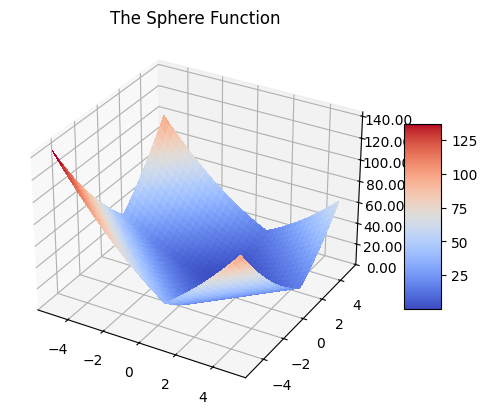

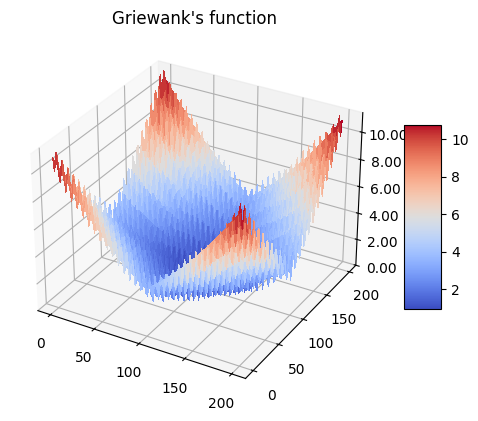

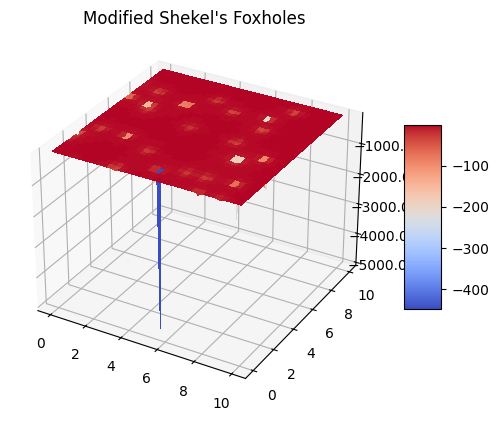

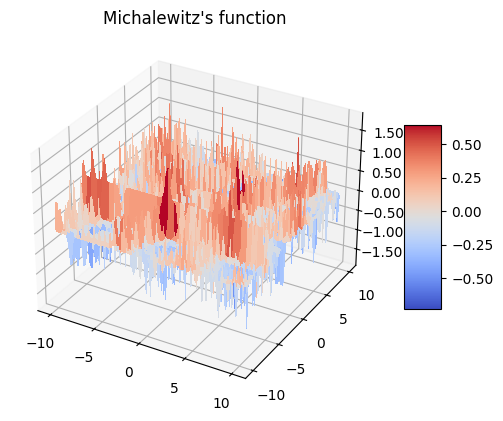

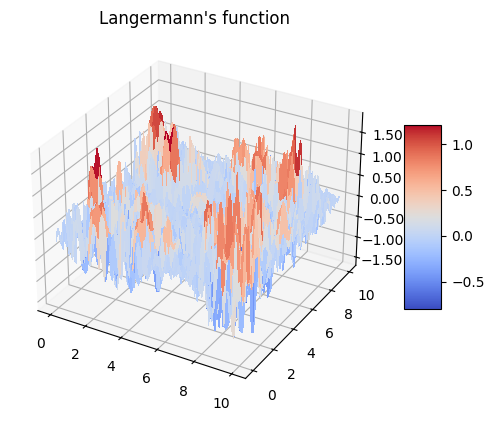

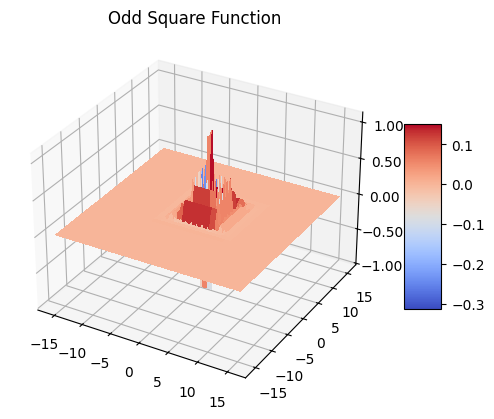

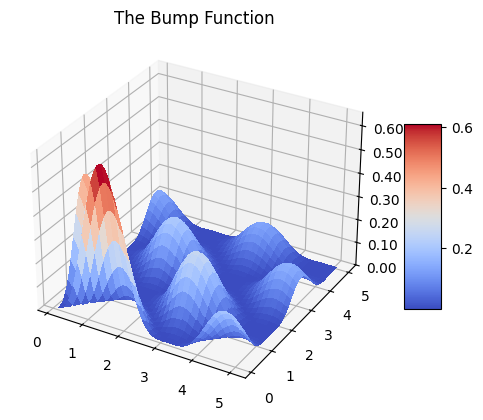

In [13]:
_plot_f(sphere, *_mesh(-5, 5, -5, 5), title="The Sphere Function")
_plot_f(griew, *_mesh(0, 200, 0, 200), title="Griewank's function")
_plot_f(shekel, *_mesh(0, 10, 0, 10), title="Modified Shekel's Foxholes")
_plot_f(micha, *_mesh(-10, 10, -10, 10), title="Michalewitz's function")
_plot_f(langermann, *_mesh(0, 10, 0, 10), title="Langermann's function")
_plot_f(odd_square, *_mesh(-5 * np.pi, 5 * np.pi, -5 * np.pi, 5 * np.pi), title="Odd Square Function")
_plot_f(bump, *_mesh(0.1, 5, 0.1, 5), title="The Bump Function")

# Now we will be implementing local search...

In [129]:
from abc import abstractmethod
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm

class FunctionOptimizer:
    """We will extend this class in two ways - a Simulated Annealing Solver and Genetic Algorithm Solver
    """

    def __init__(self, x_min: np.array, x_max: np.array):
        """All solvers using some kind of local search will have bounds on their inputs
        """
        self.x_min = x_min
        self.x_max = x_max
        self.max_input = None
        self.max_output = None

    def function_template(x: np.array) -> float:
        """For book-keeping, just make it known that the types of functions we are expecting to optimize take in numpy arrays and output scalars
        """
        return np.linalg.norm(x)

    @abstractmethod
    def maximize(self, function: type[function_template], ax: plt.Axes = None):
        """Here is where we implement the actual algorithm to maximize a function - which has different specific behaviors depending on class extension
        """
        pass

    def plot_results(self, function: type[function_template], title: str):
        """Plot the results of this solver as it attempts to maximize the given function
        """
        # We are showing the graph
        dx = (self.x_max[0] - self.x_min[0]) / 100
        dy = (self.x_max[1] - self.x_min[1]) / 100
        X, Y = np.mgrid[self.x_min[0]:self.x_max[0]+dx:dx, self.x_min[1]:self.x_max[1]+dx:dy]
        Z = np.zeros(X.shape)
        for i, j in itertools.product(range(X.shape[0]), range(X.shape[1])):
            Z[i, j] = function(np.array([X[i,j], Y[i,j]]))

        # From https://matplotlib.org/stable/gallery/mplot3d/surface3d.html#sphx-glr-gallery-mplot3d-surface3d-py
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        
        # Plot the surface
        surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
        # Customize the z axis.
        ax.set_zlim(np.min(Z), np.max(Z))
        # Customize the z axis.
        # A StrMethodFormatter is used automatically
        ax.zaxis.set_major_formatter('{x:.02f}')

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=5)

        self.maximize(function=function, ax=ax)

        plt.title(title)
        plt.show()
        plt.close(fig)

# The code for Simulated Annealing follows...

In [130]:
from math import exp
from typing import Type
import random
import numpy as np

class SimulatedAnnealingSolver(FunctionOptimizer):
    """Uses the simulated-annealing algorithm with a given scheduling function to estimate a maximum for a function
    """
    
    def __init__(self, schedule_func: Type[FunctionOptimizer.function_template], x_min: np.array, x_max: np.array, tolerance=0.000001):
        """Given a certain time - as an integer - return a temperature float, which determines how likely we are to change positions.
        The schedule function gives a temperature at a given integer input time.
        The tolerance if how close we let the temperature reach 0 before deciding we are done.
        The step_scale decides how massive our random steps are as we attempt to maximize our function
        """
        super().__init__(x_min=x_min, x_max=x_max)
        self.schedule_func = schedule_func
        self.tolerance = tolerance

    def maximize(self, function: type[FunctionOptimizer.function_template], ax: plt.Axes = None):
        """All extensions of FunctionOptimizer must implement this method
        """
        current = (self.x_min + self.x_max) / 2
        t = 0
        while True:
            x, y, stop = self.take_step(function, current=current, time=t)
            if self.max_output == None or self.max_output < y:
                if ax != None:
                    ax.scatter3D(x[0], x[1], y, color="red")
                self.max_output = np.float64(y)
                self.max_input = x

            if stop:
                break
            t += 1
    
    def take_step(self, function: type[FunctionOptimizer.function_template], current: np.array, time: int) -> tuple[np.array, float, bool]:
        """This is how our simulated annealing solver takes a step forward
        """
        temperature = self.schedule_func(time)
        if temperature <= self.tolerance:
            return current, function(current), True
        else:
            next = self.random_step(current)
            delta = function(next) - function(current)
            if delta > 0:
                # If the random change in position resulted in a positive change, we will definitely take the step in that direction
                current = next
                return current, function(current), False
            else:
                # We only have a certain chance of taking it
                prob = exp(delta / temperature)
                if random.random() <= prob:
                    current = next
                return current, function(current), False
    
    def random_step(self, current: np.array) -> np.array:
        """Take a step away from the input in a random direction
        """
        return current + np.array([(0.5 - random.random())*(self.x_max[0]-self.x_min[0]), (0.5 - random.random())*(self.x_max[1]-self.x_min[1])])

### Run the following cells repeatedly to see varying results...

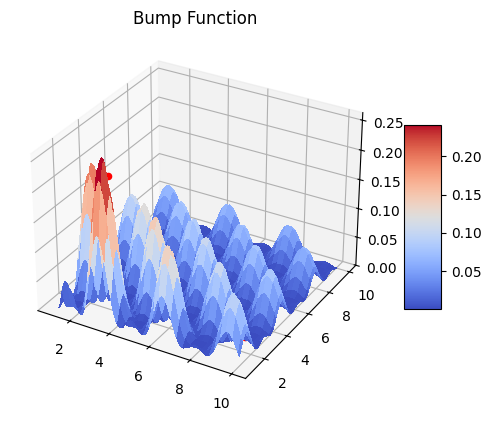

Highest Achieved: (array([3.27580048, 1.67193473]), np.float64(0.23381026655375364))


In [149]:
solver = SimulatedAnnealingSolver(lambda n : exp(-n/10), x_min=np.array([1, 1]), x_max=np.array([10, 10]),)

solver.plot_results(function=bump, title="Bump Function")
print(f"Highest Achieved: {solver.max_input, solver.max_output}")

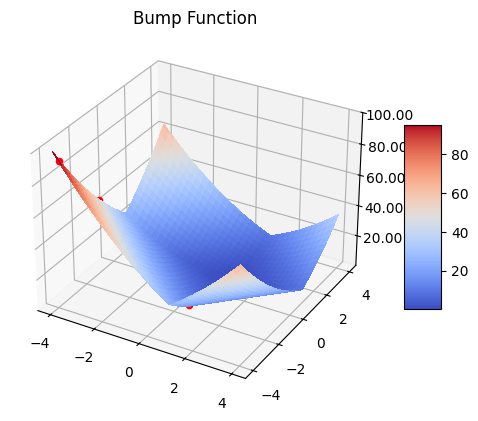

Highest Achieved: (array([-3.79714831, -3.89570568]), np.float64(93.95141842811702))


In [138]:
solver = SimulatedAnnealingSolver(lambda n : exp(-n/10), x_min=np.array([-4, -4]), x_max=np.array([4, 4]),)

solver.plot_results(function=sphere, title="Bump Function")
print(f"Highest Achieved: {solver.max_input, solver.max_output}")

# The code for Genetic Algorithms follows...

In [151]:
from bitstring import BitArray
import numpy as np

class GeneticAlgorithmSolver(FunctionOptimizer):
    """Uses a genetic algorithm to estimate a maximum for a function
    """
    
    def __init__(self, x_min: np.array, x_max: np.array, input_dims=2, generation_size=4, string_size=5):
        """Initialize the parameters for our genetic algorithm, which include string size, and where we split each string when crossing two strings
        """
        super().__init__(x_min=x_min, x_max=x_max)
        self.input_size = input_dims
        self.generation_size = max(4, generation_size)
        self.string_size = max(3, string_size)
        first, second = random.sample(range(1, self.string_size), 2)
        self.first_split = min(first, second)
        self.second_split = max(first, second)
        self.current_generation = [[self.random_bit_string() for _ in range(self.input_size)] for _ in range(self.generation_size)]

    def maximize(self, function: type[FunctionOptimizer.function_template], ax: plt.Axes = None):
        """All extensions of FunctionOptimizer must implement this method
        """
        pass

    def random_bit_string(self) -> int:
        """Return a random integer between 000..00 and 111..11 (length equal to self.string_size)
        """
        return random.sample(range(0, 2**self.string_size), 1)[0]
    
    def reproduce(self, x: int, y: int) -> tuple[int,int]:
        """Given two strings (each corresponding to an input array), create offspring from the two of them which will each correspond with a new vector
        """
        x_str = bin(x)[2:]
        y_str = bin(y)[2:]
        first_offspring = x_str[:self.first_split] + y_str[self.first_split:self.second_split] + x_str[self.second_split:]
        second_offspring = y_str[:self.first_split] + x_str[self.first_split:self.second_split] + y_str[self.second_split:]
        # Source: https://favtutor.com/blogs/binary-string-to-int-python
        return BitArray(bin=first_offspring).int, BitArray(bin=second_offspring).int